In [5]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np

## Algorithms
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from mlxtend.classifier import StackingClassifier


import matplotlib.pyplot as plt
%matplotlib inline



# Inspection
Have a look into the files.


## training features of passengers

In [2]:
train = pd.read_csv('train.csv')
train['Sex_dummies'] = train.apply(lambda row: 0.0 if row['Sex'] == 'male' else 1.0, axis=1)
len(train)
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

## The Variables

#### the influence of age

seems that with higher age the survival sinks

In [3]:
train['Age'].corr(train['Survived'])

-0.077221094572177643

how is the general distribution of Age

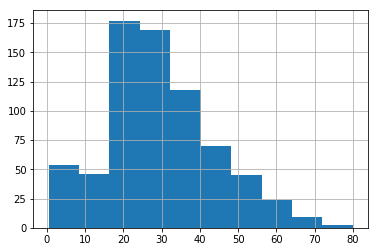

In [4]:
train['Age'].hist(bins=10)

We have mostly 18-40 y old people. Lets see, whether some age group was especially doomed to death.

In [5]:
train['Age_groups'] = pd.cut(train['Age'],8)
pd.crosstab(train['Survived'], train['Age_groups'])

Age_groups  (0.34, 10.368]  (10.368, 20.315]  (20.315, 30.263]  \
Survived                                                         
0                       26                71               146   
1                       38                44                84   

Age_groups  (30.263, 40.21]  (40.21, 50.158]  (50.158, 60.105]  \
Survived                                                         
0                        86               53                25   
1                        69               33                17   

Age_groups  (60.105, 70.052]  (70.052, 80.0]  
Survived                                      
0                         13               4  
1                          4               1

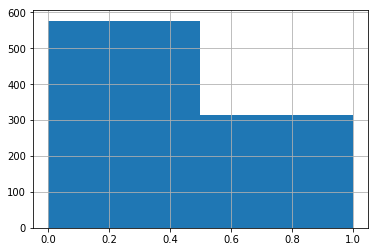

In [6]:
train['Sex_dummies'].hist(bins=2)

Seems we have the double of males than females here

In [7]:
train['Age_groups_male'] = pd.cut(train[train['Sex'] == 'male'] ['Age'],8)

pd.crosstab(train[train['Sex'] == 'male']['Survived'], train['Age_groups_male'])

Age_groups_male  (0.34, 10.368]  (10.368, 20.315]  (20.315, 30.263]  \
Survived                                                              
0.0                          14                59               126   
1.0                          19                10                23   

Age_groups_male  (30.263, 40.21]  (40.21, 50.158]  (50.158, 60.105]  \
Survived                                                              
0.0                           77               43                24   
1.0                           23               12                 4   

Age_groups_male  (60.105, 70.052]  (70.052, 80.0]  
Survived                                           
0.0                            13               4  
1.0                             1               1

In [8]:
train['Age_groups_female'] = pd.cut(train[train['Sex'] == 'female'] ['Age'],8)

pd.crosstab(train[train['Sex'] == 'female']['Survived'], train['Age_groups_female'])

Age_groups_female  (0.688, 8.531]  (8.531, 16.312]  (16.312, 24.094]  \
Survived                                                               
0.0                             7                9                16   
1.0                            19               14                52   

Age_groups_female  (24.094, 31.875]  (31.875, 39.656]  (39.656, 47.438]  \
Survived                                                                  
0.0                              15                 5                 9   
1.0                              34                36                17   

Age_groups_female  (47.438, 55.219]  (55.219, 63.0]  
Survived                                             
0.0                               2               1  
1.0                              17               8

So we see, that sex is the much more important variable here.

R-squared shows very few explainability. 
But age is significant

In [9]:
result = sm.ols(formula="Survived ~ Age", data=train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.271
Date:                Sun, 22 Oct 2017   Prob (F-statistic):             0.0391
Time:                        11:54:58   Log-Likelihood:                -503.28
No. Observations:                 714   AIC:                             1011.
Df Residuals:                     712   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4838      0.042     11.576      0.000       0.402       0.566
Age           -0.0026      0.001     -2.067      0.039      -0.005      -0.000
==============================================================================
Omnibus:                       16.419   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.965
Skew:                           0.380   Prob(JB):                     3.99e-26
Kurtosis:                       1.168   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the general survival rate was about 60%

In [10]:
survival_rate = len(train[(train['Survived'] == 1) ]) / len(train[(train['Survived'] == 0)])
survival_rate

0.6229508196721312

#### is survival connected to the Gender?

It seems that males had a much lesser chance to survive.

In [11]:
fs = len(train[(train['Survived'] == 1) & (train['Sex'] == 'female') ]) / len(train[ (train['Sex'] == 'female') & (train['Survived'] == 0)])
ms = len(train[(train['Survived'] == 1) & (train['Sex'] == 'male') ]) / len(train[ (train['Sex'] == 'male') & (train['Survived'] == 0)])

print('female survival rate=', fs)
print('male survival rate=', ms)


female survival rate= 2.876543209876543
male survival rate= 0.2329059829059829


In [12]:
pd.crosstab(train['Survived'], train['Sex'])

Sex       female  male
Survived              
0             81   468
1            233   109

#### is the ticket class connected to the Pclass?

the better your class, the higher is the survival ratio 


In [13]:
first_class_survival = len(train[(train['Survived'] == 1) & (train['Pclass'] == 1) ]) / len(train[ (train['Pclass'] == 1) & (train['Survived'] == 0)])
second_class_survival = len(train[(train['Survived'] == 1) & (train['Pclass'] == 2) ]) / len(train[ (train['Pclass'] == 2) & (train['Survived'] == 0)])
third_class_survival= len(train[(train['Survived'] == 1) & (train['Pclass'] == 3) ]) / len(train[ (train['Pclass'] == 3) & (train['Survived'] == 0)])

print('1 class survival rate=', first_class_survival)
print('2 class survival rate=', second_class_survival)
print('3 class survival rate=', third_class_survival)



1 class survival rate= 1.7
2 class survival rate= 0.8969072164948454
3 class survival rate= 0.31989247311827956


In [14]:


pd.crosstab(train['Survived'], train['Pclass'])

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

But it seems, that only 1  and 3 class had influence on the survival. For the second class, its nearly 50/50

So far, Pclass and Sex seem to be the most influential variables.
Lets build 6 groups and see, whether there is some sort of pattern there.

In [15]:
train['Sex_Pclass'] = train.apply(lambda row: row['Sex'] + str(row['Pclass']), axis=1 )
pd.crosstab(train['Survived'],train['Sex_Pclass'])

Sex_Pclass  female1  female2  female3  male1  male2  male3
Survived                                                  
0                 3        6       72     77     91    300
1                91       70       72     45     17     47

So far, we see an effect between Pclass and Sex.
For both genders, the better the class, the more survive.

The probability on survival when being female is lowered to 50/50 when you have a lower class ticket.
For males, the probability of survival is lowered even more from a not so high initial level to very small.

#### Relatives on board

Now have a look on the sibSp 

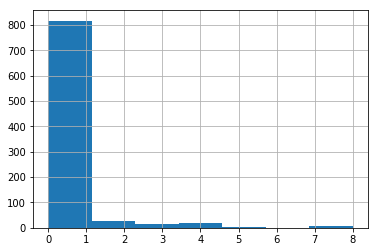

In [16]:
train['SibSp'].hist(bins=7)

Ok, seems lots of people have at least one relative on board.
Now we put the gender into the table

In [17]:
train['Sex_SibSp'] = train.apply(lambda row: row['Sex'] + str(row['SibSp']), axis=1 )
pd.crosstab(train['Survived'],train['Sex_SibSp'])

Sex_SibSp  female0  female1  female2  female3  female4  female5  female8  \
Survived                                                                   
0               37       26        3        7        4        1        3   
1              137       80       10        4        2        0        0   

Sex_SibSp  male0  male1  male2  male3  male4  male5  male8  
Survived                                                    
0            361     71     12      5     11      4      4  
1             73     32      3      0      1      0      0

 For females, less relatives mean better survival.
 For males, few relatives does not mean better survival.
 
 Lets have a look, whether sibSp>0 vs sibSp==0 looks promissing.

In [18]:
train['Sex_SibSp_2'] = train.apply(lambda row: row['Sex'] + str( 0 if row['SibSp'] == 0 else 1  ), axis=1 )
pd.crosstab(train['Survived'],train['Sex_SibSp_2'])

Sex_SibSp_2  female0  female1  male0  male1
Survived                                   
0                 37       44    361    107
1                137       96     73     36

#### Parch

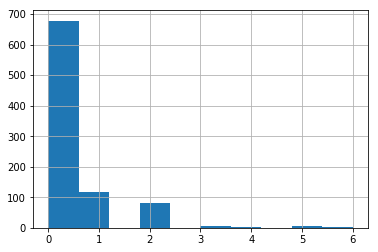

In [19]:
train['Parch'].hist()

In [20]:
train['Sex_Parch'] = train.apply(lambda row: row['Sex'] + str(row['Parch']), axis=1 )
pd.crosstab(train['Survived'],train['Sex_Parch'])

Sex_Parch  female0  female1  female2  female3  female4  female5  female6  \
Survived                                                                   
0               41       14       19        1        2        3        1   
1              153       46       30        3        0        1        0   

Sex_Parch  male0  male1  male2  male3  male4  male5  
Survived                                             
0            404     39     21      1      2      1  
1             80     19     10      0      0      0

This is similar to the influence of SibSp. A low Parch increases female survival but not male.

In [21]:
#train['Sex_Parch'] = train.apply(lambda row: row['Sex'] + str( 0 if row['Parch'] == 0 else 1), axis=1 )
train['Parch_2'] = train.apply(lambda row:  0 if row['Parch'] == 0 else 1, axis=1 )
pd.crosstab(train['Survived'],train['Parch_2'])

Parch_2     0    1
Survived          
0         445  104
1         233  109

#### embarked

Also, this seems not to be of any influence, we have a look on it.

In [22]:
pd.crosstab(train['Survived'],train['Embarked'])

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

In [23]:
train['Sex_Embarked'] = train.apply(lambda row: row['Sex'] + str(row['Embarked']), axis=1 )
pd.crosstab(train['Survived'],train['Sex_Embarked'])

Sex_Embarked  femaleC  femaleQ  femaleS  femalenan  maleC  maleQ  maleS
Survived                                                               
0                   9        9       63          0     66     38    364
1                  64       27      140          2     29      3     77

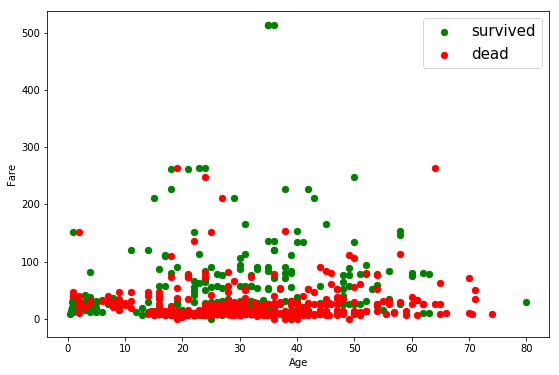

In [25]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

### what is the influence of different variables on the survival
We try logistic regression.

'Age' is influencing survival by 1% per year (the higher the less likely).

'Sex' has an impact of factor 11-12 - means, your survival is generally 11-12 times higher when you are female.

'Pclass': The better your class, the better you survive. (each class level is degrading the survival chance by factor 0.27)

Parch and SibSp is not quite clear.



In [26]:

train['relatives_on_board'] = train[['SibSp','Parch']].sum(axis=1) 
train['intercept'] = 1.0
logit = sm.Logit( train['Survived'], train[['Age','Sex_dummies','Pclass', 'SibSp', 'intercept']], missing='drop').fit()

print(np.exp(logit.params))
logit.summary()


Optimization terminated successfully.
         Current function value: 0.445882
         Iterations 6
Age             0.956586
Sex_dummies    13.783654
Pclass          0.267831
SibSp           0.686521
intercept      19.635963
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Oct 2017   Pseudo R-squ.:                  0.3399
Time:                        15:25:37   Log-Likelihood:                -318.36
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.089e-69
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0444      0.008     -5.442      0.000      -0.060      -0.028
Sex_dummies     2.6235      0.215     12.229      0.000       2.203       3.044
Pclass         -1.3174      0.141     -9.350      0.000      -1.594      -1.041
SibSp          -0.3761      0.121     -3.106      0.002      -0.613      -0.139
intercept       2.9774      0.486      6.130      0.000       2.025       3.929
===============================================================================
"""

## Now Classify
### approach 1
Variables:
- Age
- Sex_dummies
- Pclass
- relatives_on_board

In [ ]:
test = pd.read_csv('test.csv')
test['intercept'] = 1.0
test['Sex_dummies'] = test.apply(lambda row: 0.0 if row['Sex'] == 'male' else 1.0, axis=1)
test['relatives_on_board'] = test[['SibSp','Parch']].sum(axis=1) 

test['survival_prb']= logit.predict(test[['Age','Sex_dummies','Pclass', 'relatives_on_board', 'intercept']])
test['Survived'] = test.apply(lambda row: 1 if row['survival_prb'] > 0.5 else 0, axis=1)
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v1a.csv', index=False)

outcome in leaderboard:`0.76076`

Because 'Age' is not so strong in explainability, we drop it, and try it now.

In [ ]:
test = pd.read_csv('test.csv')
test['intercept'] = 1.0
test['Sex_dummies'] = test.apply(lambda row: 0.0 if row['Sex'] == 'male' else 1.0, axis=1)
test['relatives_on_board'] = test[['SibSp','Parch']].sum(axis=1) 

logit = sm.Logit( train['Survived'], train[['Sex_dummies','Pclass', 'relatives_on_board', 'intercept']], missing='drop').fit()

test['survival_prb']= logit.predict(test[['Sex_dummies','Pclass', 'relatives_on_board', 'intercept']])
test['Survived'] = test.apply(lambda row: 1 if row['survival_prb'] > 0.5 else 0, axis=1)
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v1b.csv', index=False)

outcome: .77033 which is better than with age

The thesis is now, that 'relatives_on_board' makes the outcome worse.
So lets try only with SibSp, because from other investigations we know that Parch is not a good variable.

In [ ]:
test = pd.read_csv('test.csv')
test['intercept'] = 1.0
test['Sex_dummies'] = test.apply(lambda row: 0.0 if row['Sex'] == 'male' else 1.0, axis=1)

logit = sm.Logit( train['Survived'], train[['Sex_dummies','Pclass', 'SibSp', 'intercept']], missing='drop').fit()

test['survival_prb']= logit.predict(test[['Sex_dummies','Pclass', 'SibSp', 'intercept']])
test['Survived'] = test.apply(lambda row: 1 if row['survival_prb'] > 0.5 else 0, axis=1)
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v1c.csv', index=False)

outcome: .77033 still, so we take in the age again to try

In [ ]:
test = pd.read_csv('test.csv')
test['intercept'] = 1.0
test['Sex_dummies'] = test.apply(lambda row: 0.0 if row['Sex'] == 'male' else 1.0, axis=1)

logit = sm.Logit( train['Survived'], train[['Age','Sex_dummies','Pclass', 'SibSp', 'intercept']], missing='drop').fit()

test['survival_prb']= logit.predict(test[['Age','Sex_dummies','Pclass', 'SibSp', 'intercept']])
test['Survived'] = test.apply(lambda row: 1 if row['survival_prb'] > 0.5 else 0, axis=1)
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v1d.csv', index=False)

outcome: 0.76076 - worse than before - age seems to be a bad predictor

Result:
Its works best with 'Sex_dummies','Pclass', 'SibSp' and dropping of nan.

## approach 2

lets see whether cabin level and number can be taken into consideration.
How much NaNs are in the Cabin. Seems we have around 77 % missing cabin information.
So we cannot use this info.

In [ ]:
cabin_ratio =  len(train[ pd.isnull(train['Cabin'])]) / len(train)
cabin_ratio

So try out SVM for classification.
Because svm cannot run with nans, we drop 'Age' for testing, because 'Age' has only few influence.

In [ ]:

train_dropped = train[['Sex_dummies','Pclass', 'relatives_on_board', 'Survived']].dropna()
#train_dropped

X = train_dropped[['Sex_dummies','Pclass', 'relatives_on_board']].values
y = train_dropped[['Survived']].values.flatten()

clf = svm.SVC()
clf.fit(X, y)

test['relatives_on_board'] = test[['SibSp','Parch']].sum(axis=1) 
test['Survived'] = clf.predict(test[['Sex_dummies','Pclass', 'relatives_on_board']].values)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2a.csv', index=False)


This brings us an improvement to 0.77033.

But we want to have a look, how it would be when we use 'Age'.
We can do this by imputing missing 'Age' values.

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(train[['Age','Sex_dummies','Pclass', 'relatives_on_board', 'Survived']])
train_imp = imp.transform(train[['Age','Sex_dummies','Pclass', 'relatives_on_board', 'Survived']])

imp.fit(train[['Age','Sex_dummies','Pclass', 'relatives_on_board']])
test_imp = imp.transform(test[['Age','Sex_dummies','Pclass', 'relatives_on_board']])

X = train_imp[0:,0:-1]
y = train_imp[0:, -1:].flatten()
clf = svm.SVC()
clf.fit(X, y)  
test['Survived'] = clf.predict(test_imp)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2b.csv', index=False)

This does not improve anything - its even worse than logit (0.73).

Just for completeness, we try it with the SibSp instead of relatives_on_board.

In [ ]:
from sklearn import svm
train_dropped = train[['Sex_dummies','Pclass', 'SibSp', 'Survived']].dropna()
#train_dropped

X = train_dropped[['Sex_dummies','Pclass', 'SibSp']].values
y = train_dropped[['Survived']].values.flatten()

clf = svm.SVC()
clf.fit(X, y)

# pseudo squared error
# train['pred'] = clf.predict(train[['Sex_dummies','Pclass', 'SibSp']].values)
# train['pred'].corr(train['Survived']) ** 2.0

test['Survived'] = clf.predict(test[['Sex_dummies','Pclass', 'SibSp']].values)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2c.csv', index=False)

We have an improvement:
outcome is now:     0.77511

We take in the Fare also

In [ ]:
from sklearn import svm
train_dropped = train[['Sex_dummies','Pclass', 'SibSp', 'Fare', 'Survived']].dropna()
#train_dropped

X = train_dropped[['Sex_dummies','Pclass', 'Fare', 'SibSp']].values
y = train_dropped[['Survived']].values.flatten()

clf = svm.SVC()
clf.fit(X, y)

# pseudo squared error
# train['pred'] = clf.predict(train[['Sex_dummies','Pclass', 'SibSp']].values)
# train['pred'].corr(train['Survived']) ** 2.0

imp.fit(test[['Sex_dummies','Pclass', 'Fare', 'SibSp']])
test_imp = imp.transform(test[['Sex_dummies','Pclass', 'Fare', 'SibSp']])
test_imp

test['Survived'] = clf.predict(test_imp)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2cc.csv', index=False)

outcome: 0.73684

We try out the polynomial kernel, for non-linearity

In [ ]:
from sklearn import svm
train_dropped = train[['Sex_dummies','Pclass', 'SibSp', 'Survived']].dropna()
#train_dropped

X = train_dropped[['Sex_dummies','Pclass', 'SibSp']].values
y = train_dropped[['Survived']].values.flatten()

clf = svm.SVC(kernel='poly', degree=1)
clf.fit(X, y)

test['Survived'] = clf.predict(test[['Sex_dummies','Pclass', 'SibSp']].values)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2d.csv', index=False)


old = pd.read_csv('titanic_submission_v2c.csv')
new = pd.read_csv('titanic_submission_v2d.csv')


merged = pd.merge(old,new, left_on='PassengerId', right_on='PassengerId')

merged[merged['Survived_x'] != merged['Survived_y']]



result: 0.76555

As we learned, that Pclass and Sex are the most reliable variables we try them:

In [ ]:
train_dropped = train[['Sex_dummies','Pclass', 'Survived']].dropna()

X = train_dropped[['Sex_dummies','Pclass']].values
y = train_dropped[['Survived']].values.flatten()

clf = svm.SVC()
clf.fit(X, y)

test['Survived'] = clf.predict(test[['Sex_dummies','Pclass']].values)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2e.csv', index=False)

also: 0.76555

with random forrest we found that Age seems to be important.
We will check this.
We cannot drop Age here, so we need the imputer

In [ ]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(train[['Age','Sex_dummies','Pclass', 'Survived']])
train_imp = imp.transform(train[['Age','Sex_dummies','Pclass', 'Survived']])

imp.fit(train[['Age','Sex_dummies','Pclass']])
test_imp = imp.transform(test[['Age','Sex_dummies','Pclass']])

X = train_imp[0:,0:-1]
y = train_imp[0:, -1:].flatten()
clf = svm.SVC()
clf.fit(X, y)  
test['Survived'] = clf.predict(test_imp)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2f.csv', index=False)

In [ ]:
train_dropped = train[['Sex_dummies','Pclass', 'SibSp', 'Parch', 'Survived']].dropna()
#train_dropped

X = train_dropped[['Sex_dummies','Pclass', 'SibSp', 'Parch']].values
y = train_dropped[['Survived']].values.flatten()

clf = svm.SVC()
clf.fit(X, y)

test['Survived'] = clf.predict(test[['Sex_dummies','Pclass', 'SibSp', 'Parch']].values)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v2g.csv', index=False)


## approach 3

Try out the last setting non linear svm (NuSVC).

In [ ]:
train_dropped = train[['Sex_dummies','Pclass', 'SibSp', 'Survived']].dropna()
#train_dropped

X = train_dropped[['Sex_dummies','Pclass', 'SibSp']].values
y = train_dropped[['Survived']].values.flatten()
clf = svm.NuSVC()

clf.fit(X, y)  

test['Survived'] = clf.predict(test[['Sex_dummies','Pclass', 'SibSp']].values)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v3a.csv', index=False)

outcome is still:     0.77511 - no improvment

## Results so far

| Variables | logit  | linear SVM | linear SVM poly degree=1 |
|-----------|--------|------------|--------------------------|
|ASPRa      | .76076 | .73205 (d) |                          |
|ASPSs      | .76076 | NaN        |                          |
|SPRa       | .77033 | .77033     |                          |
|SPSs       | .77033 | **.77511** | .76555                   |
|SPSsPa     | Nan    | **.77511** |                          |
|SP         | Nan    | .76555     |                          |
|ASP        | Nan    | .73205     |                          |


A = AGE 
S = Sex
P = Pclass
Ss = SibSp
Pa = Parch
Ra = sum(SibSp, Parch)


## TODOS:
- try parameters of the linear SVM  --> clf = svm.SVC(kernel='poly')
- use neural networks
- use random forests

In [ ]:
### select important features by using random forests
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

train_dropped = train[['Age','Sex_dummies','Pclass', 'Parch', 'SibSp', 'Survived']].dropna()
forest.fit(train_dropped[['Age','Sex_dummies','Pclass', 'Parch', 'SibSp']], train_dropped['Survived'])
importances = forest.feature_importances_
importances
    

### Feature engeneering for further investigation
We found out that Age and Sex and Pclass and Sex have a strong influence in combination. 
So we try interpolation for logistic 

- Age 
- Sex 
- Pclass  
- Age*Sex 
- Sex*Pclass 
- SibSp 

In [ ]:
test = pd.read_csv('test.csv')
test['intercept'] = 1.0
test['Sex_dummies'] = test.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
test['Age_Sex'] = test.apply(lambda row: row['Sex_dummies'] * row['Age'], axis=1)
test['Pclass_Sex'] = test.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)

train['intercept'] = 1.0
train['Sex_dummies'] = train.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
train['Age_Sex'] = train.apply(lambda row: row['Sex_dummies'] * row['Age'], axis=1)
train['Pclass_Sex'] = train.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)
logit = sm.Logit( train['Survived'], train[['Age','Sex_dummies','Pclass', 'SibSp', 'Age_Sex', 'Pclass_Sex', 'intercept']], missing='drop').fit()


print(np.exp(logit.params))
logit.summary()

#test['survival_prb']= logit.predict(test[['Age','Sex_dummies','Pclass', 'SibSp', 'Age_Sex', 'Pclass_Sex', 'intercept']])
#test['Survived'] = test.apply(lambda row: 1 if row['survival_prb'] > 0.5 else 0, axis=1)
#test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v4a.csv', index=False)

outcome: .76555

In [ ]:
test = pd.read_csv('test.csv')
test['intercept'] = 1.0
test['Sex_dummies'] = test.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
test['Age_Sex'] = test.apply(lambda row: row['Sex_dummies'] * row['Age'], axis=1)
test['Pclass_Sex'] = test.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)

train['intercept'] = 1.0
train['Sex_dummies'] = train.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
train['Age_Sex'] = train.apply(lambda row: row['Sex_dummies'] * row['Age'], axis=1)
train['Pclass_Sex'] = train.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)
logit = sm.Logit( train['Survived'], train[['Sex_dummies','Pclass', 'SibSp', 'Age_Sex', 'Pclass_Sex', 'intercept']], missing='drop').fit()




#test['survival_prb']= logit.predict(test[['Sex_dummies','Pclass', 'SibSp', 'Age_Sex', 'Pclass_Sex', 'intercept']])
#test['Survived'] = test.apply(lambda row: 1 if row['survival_prb'] > 0.5 else 0, axis=1)
#test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v4b.csv', index=False)

outcome: 0.77511

In [27]:
test = pd.read_csv('test.csv')
test['intercept'] = 1.0
test['Sex_dummies'] = test.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
test['Pclass_Sex'] = test.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)

train['intercept'] = 1.0
train['Sex_dummies'] = train.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
train['Pclass_Sex'] = train.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)
logit = sm.Logit( train['Survived'], train[['Sex_dummies','Pclass', 'SibSp', 'Pclass_Sex', 'intercept']], missing='drop').fit()

test['survival_prb']= logit.predict(test[['Sex_dummies','Pclass', 'SibSp', 'Pclass_Sex', 'intercept']])
test['Survived'] = test.apply(lambda row: 1 if row['survival_prb'] > 0.5 else 0, axis=1)
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v4c.csv', index=False)

Optimization terminated successfully.
         Current function value: 0.447179
         Iterations 7


outcome: 0.77511


## Now test random forrest

In [28]:
from sklearn.ensemble import RandomForestClassifier

test = pd.read_csv('test.csv')
test['Sex_dummies'] = test.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
test['Pclass_Sex'] = test.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)

train = pd.read_csv('train.csv')
train['Sex_dummies'] = train.apply(lambda row: 1.0 if row['Sex'] == 'male' else 2.0, axis=1)
train['Pclass_Sex'] = train.apply(lambda row: row['Sex_dummies'] * row['Pclass'], axis=1)

X = train[['Sex_dummies','Pclass', 'SibSp', 'Pclass_Sex']].values
y = train[['Survived']].values.flatten()

clf = RandomForestClassifier(max_features='sqrt')
clf.fit(X, y)  

test['Survived'] = clf.predict(test[['Sex_dummies','Pclass', 'SibSp', 'Pclass_Sex']].values)
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId','Survived']].to_csv( path_or_buf='titanic_submission_v5a.csv', index=False)

outcome:  0.75598